In [4]:
!pip install -r requirements.txt

  Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl.metadata (363 bytes)
  Using cached python_gnupg-0.5.4-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl (45 kB)
Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl (12 kB)
Using cached eep153_tools-0.12.4-py2.py3-none-any.whl (4.9 kB)
Using cached python_gnupg-0.5.4-py2.py3-none-any.whl (21 kB)
Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl (27 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
  Attempting uninstall: gspread_pandas
    Found existing installation: gspread-pandas 2.2.3
    Uninstalling gspread-pandas-2.2.3:
      Successfully uninstalled gspread-pandas-2

In [20]:

p = pd.read_csv('./Data/Malawi_Food_Prices(2019-20).csv', header= 0).set_index(['t', 'm', 'j', 'u'])
p = p.groupby(['t', 'm', 'j', 'u']).median()
p = p.xs('kg', level="u").squeeze().unstack('j')
p

j                       Apple     Avocado      Banana  Bean, brown  \
t       m                                                            
2019-20 Central   1414.290360  268.340937  341.134521   875.453306   
        North     1234.567888  250.090157  432.940761  1172.693982   
        Southern  1296.160301  217.267986  464.014498   893.966960   

j                 Bean, white         Beef     Biscuits  Boiled groundnuts  \
t       m                                                                    
2019-20 Central    943.344230  2257.853290  1022.377230         623.069449   
        North     1104.133585  3152.472103  1273.880363         599.703470   
        Southern   899.640896  2237.571568  1037.193952         566.617319   

j                 Boiled sweet potatoes  \
t       m                                 
2019-20 Central              242.013894   
        North                439.882672   
        Southern             196.140801   

j                 Bottled / canned beer (carlsberg, etc)  ...      Tomato  \
t       m                                                 ...               
2019-20 Central                               911.078224  ...  434.954545   
        North                                 884.585752  ...  449.853182   
        Southern                             1182.194911  ...  441.788568   

j                 Tomato sauce (bottle)  Traditional beer (masese)  \
t       m                                                            
2019-20 Central             1448.611105                 284.476495   
        North               1597.511831                 256.194570   
        Southern           36851.388890                 257.731850   

j                 Wheat flour  White sweet potato  \
t       m                                           
2019-20 Central    659.629630          147.109178   
        North      744.776423          152.203290   
        Southern   661.380471          134.485728   

j                 Wild fruit (masau, malambe, etc)  Wine or commercial liquor  \
t       m                                                                       
2019-20 Central                         492.544372                 718.764548   
        North                           687.727752                 752.298947   
        Southern                        374.983068                1078.772575   

j                 Yeast, baking powder, bicarbonate of soda      Yoghurt  \
t       m                                                                  
2019-20 Central                                  941.065276   922.779944   
        North                                   1151.196679   894.806064   
        Southern                                 814.632703  1227.230822   

j                 Zikondamoyo / nkate  
t       m                              
2019-20 Central            279.761903  
        North              224.720747  
        Southern           374.106652  

[3 rows x 133 columns]

In [22]:
import pandas as pd
import numpy as np
import cfe
#from eep153_tools.sheets import read_sheets

# === 1. Food Expenditures ===
#x = read_sheets(Senegal_Data, sheet='Food Expenditures (2019)')
x = pd.read_csv("./Data/Malawi_Food_Expenditures(2019-20).csv", header= 0, index_col=0).reset_index()
x = x.set_index(['i', 't', 'm', 'j']).squeeze()

# === 2. Food Prices ===
#p = read_sheets(Senegal_Data, sheet='Food Prices (2019)').set_index(['t', 'm', 'j', 'u'])
p = pd.read_csv('./Data/Malawi_Food_Prices(2019-20).csv', header= 0).set_index(['t', 'm', 'j', 'u'])

# Compute medians of prices for each (t, m, j, u)
p = p.groupby(['t', 'm', 'j', 'u']).median()

# Keep only Kg unit
p = p.xs('kg', level="u").squeeze().unstack('j')

# Find intersection of goods between price data and expenditure data
common_goods = list(set(p.columns).intersection(set(x.index.get_level_values('j'))))

# Filter both datasets to those goods
p = p[common_goods].T

# === 3. Household Characteristics ===
#d = read_sheets(Senegal_Data, sheet='Household Characteristics')
d = pd.read_csv('./Data/Malawi_Household_Characteristics.csv', header= 0)
d.columns.name = 'k'

# Replace blanks with zeros
d = d.replace(np.nan, 0)

# Group expenditures and clean
x = x.T.groupby(['i', 't', 'm', 'j']).sum()
x = x.replace(0, np.nan)

# Take logs of expenditures
y = np.log(x)

# Set index for household characteristics
d.set_index(['i', 't', 'm'], inplace=True)


,,k,boys,women,girls,men,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,,,,,
10101002025,2004-05,North,3,1,2,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1.945910
10101002051,2004-05,North,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1.098612
10101002072,2004-05,North,3,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1.791759
10101002079,2004-05,North,1,1,3,1,0,2,1,1,0,0,0,0,0,0,1,1,0,0,1.791759
10101002095,2004-05,North,2,1,2,1,0,0,0,2,2,0,0,0,1,1,0,0,0,0,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315538160177,2019-20,Southern,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.098612
315538160189,2019-20,Southern,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.098612
315538160190,2019-20,Southern,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000


In [23]:
y.head()

i             t        m      j              
101011000014  2019-20  North  Chinese cabbage    5.298317
                              Chips (vendor)     6.214608
                              Cooking oil        5.298317
                              Onion              4.605170
                              Salt               5.010635
Name: Expenditure, dtype: float64

In [24]:
from cfe import Regression

result = Regression(y=y,d=d)

In [25]:
result.predicted_expenditures()

i             t        m         j                                        
101011000071  2019-20  North     Avocado                                       383.113800
                                 Banana                                        494.138806
                                 Bean, brown                                   635.824825
                                 Beef                                         2522.707026
                                 Biscuits                                      453.344044
                                                                                 ...     
315538160239  2019-20  Southern  Tomato                                        348.301365
                                 White sweet potato                            293.415618
                                 Wild fruit (masau, malambe, etc)              128.500366
                                 Yeast, baking powder, bicarbonate of soda      38.553488
                         

y  \
i            t       m        j                                                     
101011000014 2019-20 North    Chinese cabbage                            5.298317   
                              Chips (vendor)                             6.214608   
                              Cooking oil                                5.298317   
                              Onion                                      4.605170   
                              Salt                                       5.010635   
...                                                                           ...   
315538160239 2019-20 Southern Tomato                                     5.703782   
                              White sweet potato                              NaN   
                              Wild fruit (masau, malambe, etc)                NaN   
                              Yeast, baking powder, bicarbonate of soda       NaN   
                              Yoghurt                                         NaN   

                                                                             yhat  
i            t       m        j                                                    
101011000014 2019-20 North    Chinese cabbage                                 NaN  
                              Chips (vendor)                                  NaN  
                              Cooking oil                                     NaN  
                              Onion                                           NaN  
                              Salt                                            NaN  
...                                                                           ...  
315538160239 2019-20 Southern Tomato                                     5.695644  
                              White sweet potato                         5.508403  
                              Wild fruit (masau, malambe, etc)           4.728829  
                              Yeast, baking powder, bicarbonate of soda  3.462892  
                              Yoghurt                                    5.958665  

[336437 rows x 2 columns]

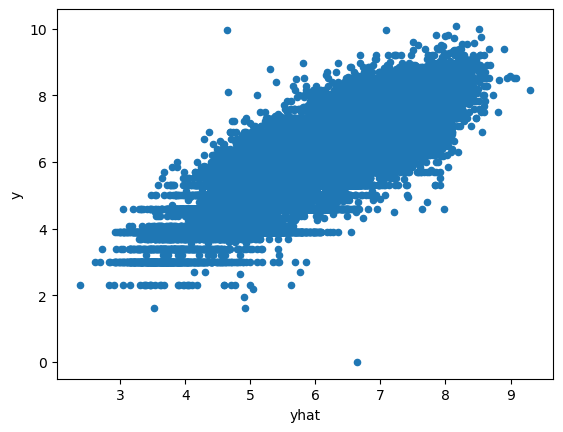

In [26]:
%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')
df

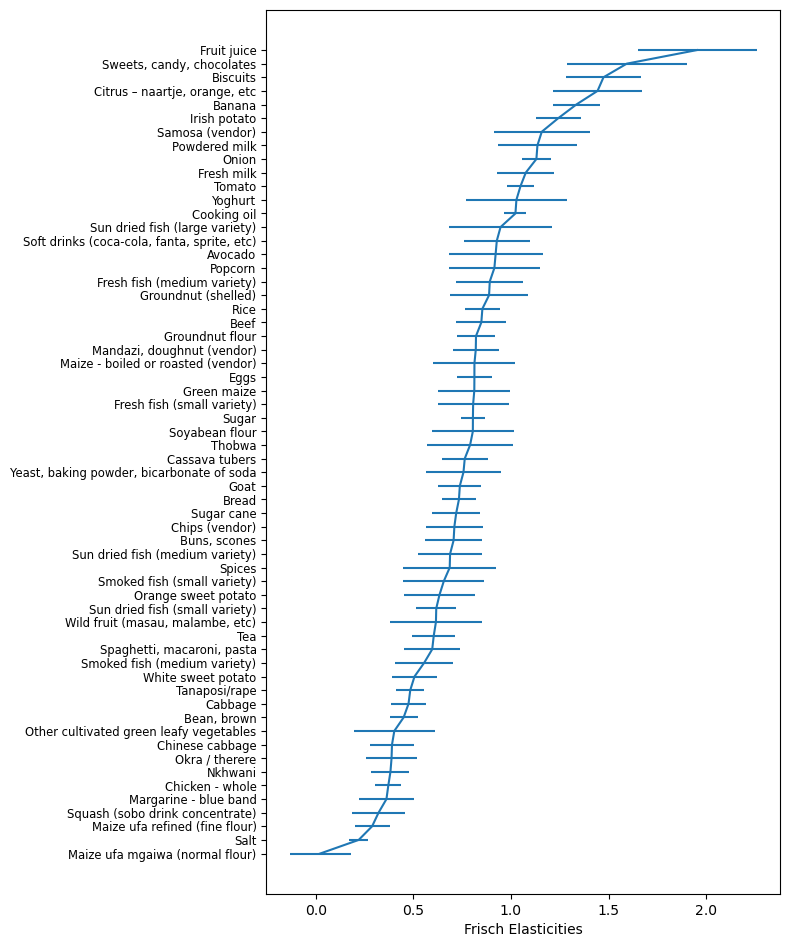

In [27]:
ax = result.graph_beta()

In [28]:
result.get_beta()

j
Avocado                                        0.921294
Banana                                         1.334759
Bean, brown                                    0.450482
Beef                                           0.848220
Biscuits                                       1.473836
Bread                                          0.733515
Buns, scones                                   0.706256
Cabbage                                        0.475333
Cassava tubers                                 0.763293
Chicken - whole                                0.371848
Chinese cabbage                                0.390740
Chips (vendor)                                 0.710060
Citrus – naartje, orange, etc                  1.443437
Cooking oil                                    1.022874
Eggs                                           0.812722
Fresh fish (medium variety)                    0.891365
Fresh fish (small variety)                     0.806225
Fresh milk                                    

In [29]:
result.get_gamma()

k,boys,women,girls,men,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Constant
j,,,,,,,,,,,,,,,,,,,,
Avocado,0.082647,-0.090723,0.144770,0.092839,-0.129338,-0.118272,-0.049004,-0.061163,-0.067161,-0.067830,0.038878,-0.063025,-0.044142,0.266145,0.134229,0.212044,0.292025,-0.113853,0.040441,5.516114
Banana,0.104810,0.073983,0.058964,0.073886,-0.196715,-0.099001,-0.114737,-0.121824,-0.091441,-0.077725,0.043976,0.014603,0.064162,0.188511,0.262776,0.166508,0.210675,0.061876,-0.125813,5.872214
"Bean, brown",0.014614,0.006570,0.030126,0.076077,-0.007089,-0.069699,0.027749,-0.027467,0.061507,0.024705,-0.020495,0.021717,-0.024224,0.001893,-0.008380,0.028232,0.061621,0.057314,0.266043,6.317071
Beef,0.065358,-0.045032,0.140557,0.010509,-0.108395,-0.168342,-0.129444,-0.200415,-0.081508,-0.154756,0.016466,-0.016846,0.076641,0.165125,0.160422,0.254164,0.141686,0.216594,0.062565,7.604313
Biscuits,0.089625,-0.111137,0.202924,0.023444,-0.196408,-0.155116,-0.095067,-0.269942,-0.098385,-0.161057,0.035065,-0.036240,0.052660,0.323296,0.225794,0.377689,0.189411,0.013156,-0.275774,5.804591
Bread,0.027696,-0.026787,0.023645,-0.000171,-0.160218,-0.122044,-0.075374,-0.088141,-0.077322,-0.016999,-0.024068,-0.009209,0.107657,0.096227,0.175944,0.121870,0.080906,0.015154,0.282308,6.704532
"Buns, scones",0.029256,-0.008974,0.005267,0.021913,-0.110431,-0.035423,-0.061614,-0.055248,-0.036377,-0.087840,-0.051052,-0.031513,0.072326,0.041499,0.138298,0.131329,0.100019,0.033490,0.299649,6.073001
Cabbage,0.022490,-0.004530,0.036722,0.030964,-0.002503,-0.059305,0.006937,-0.033518,-0.035650,-0.014339,-0.009136,0.079665,0.035686,-0.030627,0.020633,0.036823,0.037488,0.053492,0.104331,5.444805
Cassava tubers,0.061342,-0.013895,0.029636,-0.023772,-0.123503,-0.125989,-0.041878,-0.062891,-0.040469,-0.060344,0.006801,-0.000595,0.069783,0.117554,0.097140,0.090437,0.069695,0.057569,0.324469,5.713932


<Axes: ylabel='Density'>

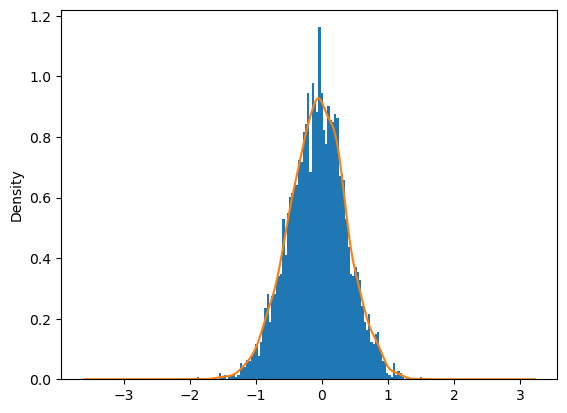

In [30]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

In [33]:
# Save the regression result
result.to_pickle('malawi_estimates.rgsn')

In [34]:

result = cfe.regression.read_pickle('malawi_estimates.rgsn')

In [35]:


# Get predicted expenditures
xhat = result.predicted_expenditures()

# Total food expenditures per household (i, t, m)
xbar = xhat.groupby(['i', 't', 'm']).sum()

# Reference budget: median household's budget
xref = xbar.quantile(0.5)  # 50th percentile

In [36]:
# Step 1: Average prices across markets
pbar = p.mean(axis=1)  # average over markets (axis=1)

# Step 2: Keep only goods that exist in both price data and estimated betas
estimated_goods = result.beta.index             # goods estimated by the model
available_goods = pbar.index                    # goods for which we have price data
common_goods = estimated_goods.intersection(available_goods)  # safe intersection
pbar = pbar.loc[common_goods]

# Step 3: Replace any missing values with 1 (for stability in simulations)
pbar = pbar.replace(np.nan, 1)

def my_prices(p0, j, p=pbar):
    """
    Change price of j-th good to p0, holding other prices fixed.
    
    Parameters:
    p0: new price to set
    j:  name of the good (string)
    p:  reference price vector (default: pbar)
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [37]:
pbar.head()

j
Avocado         245.233026
Banana          412.696593
Bean, brown     980.704749
Beef           2549.298987
Biscuits       1111.150515
dtype: float64

In [38]:
import matplotlib.pyplot as plt


#Step 1: Get average price per good from the data
pbar_full = p.mean(axis=1)  # Average across markets

#Step 2: Reindex to match the order of goods used in the regression model
goods = result.beta.index  # This is the correct good order expected by the model
pbar = pbar_full.reindex(goods)  # Align price vector to match model order

#Step 3: Fill any missing prices with 1 (to avoid errors)
pbar = pbar.fillna(1)

#Step 4: Choose a good from the list (make sure it's in result.beta.index)
print("Available goods:", list(pbar.index))
use = 'Butter'  # Replace with another valid good if needed

#Step 5: Define a safe price-change function
def my_prices(p0, j, p=pbar):
    p = p.copy()
    p.loc[j] = p0
    return p

#Step 6: Plot demand curve
scale = np.linspace(0.5, 2, 20)

#Demand at median budget
plt.plot(
    [result.demands(xref, my_prices(pbar[use] * s, use))[use] for s in scale],
    scale,
    label='Median HH'
)

#25th percentile budget
plt.plot(
    [result.demands(xbar.quantile(0.25), my_prices(pbar[use] * s, use))[use] for s in scale],
    scale,
    label='25th %ile HH'
)

#75th percentile budget
plt.plot(
    [result.demands(xbar.quantile(0.75), my_prices(pbar[use] * s, use))[use] for s in scale],
    scale,
    label='75th %ile HH'
)

#Step 7: Final plot formatting
plt.xlabel(f"Quantities of {use} Demanded")
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.title(f"Demand Curve for {use}")
plt.legend()
plt.grid(True)
plt.show()

Available goods: ['Avocado', 'Banana', 'Bean, brown', 'Beef', 'Biscuits', 'Bread', 'Buns, scones', 'Cabbage', 'Cassava tubers', 'Chicken - whole', 'Chinese cabbage', 'Chips (vendor)', 'Citrus – naartje, orange, etc', 'Cooking oil', 'Eggs', 'Fresh fish (medium variety)', 'Fresh fish (small variety)', 'Fresh milk', 'Fruit juice', 'Goat', 'Green maize', 'Groundnut (shelled)', 'Groundnut flour', 'Irish potato', 'Maize - boiled or roasted (vendor)', 'Maize ufa mgaiwa (normal flour)', 'Maize ufa refined (fine flour)', 'Mandazi, doughnut (vendor)', 'Margarine - blue band', 'Nkhwani', 'Okra / therere', 'Onion', 'Orange sweet potato', 'Other cultivated green leafy vegetables', 'Popcorn', 'Powdered milk', 'Rice', 'Salt', 'Samosa (vendor)', 'Smoked fish (medium variety)', 'Smoked fish (small variety)', 'Soft drinks (coca-cola, fanta, sprite, etc)', 'Soyabean flour', 'Spaghetti, macaroni, pasta', 'Spices', 'Squash (sobo drink concentrate)', 'Sugar', 'Sugar cane', 'Sun dried fish (large variety)', 

KeyError: 'Butter'